In [1]:
!pip install geoplot
!pip install geopandas
!pip install regionmask

In [2]:
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np  
import regionmask
import seaborn as sns
from sklearn.cluster import KMeans
import glob
import os

C:\Users\Neeraja\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\Neeraja\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\Neeraja\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


### Insights for Task 2


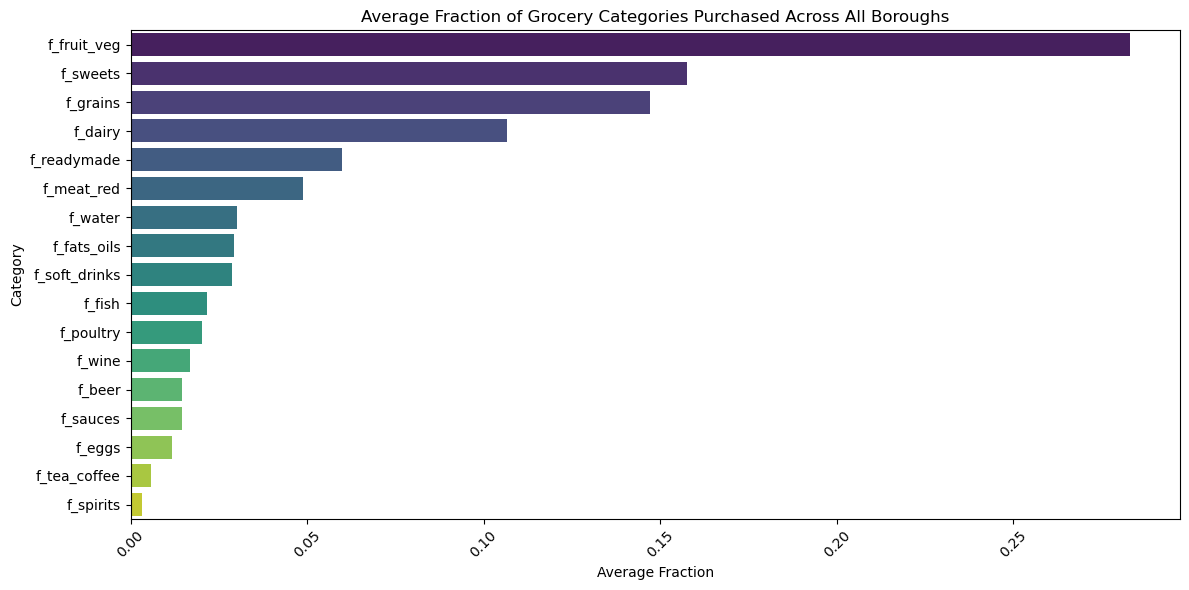

Top 5 most purchased grocery categories:
f_fruit_veg    0.282998
f_sweets       0.157622
f_grains       0.147012
f_dairy        0.106481
f_readymade    0.059777


In [13]:
df = pd.read_csv("C:/Users/Neeraja/Desktop/ads cw/datasets/tesco/purchasedata/borough_yearly.csv")

# Calculate mean values for each category across all areas
category_means = df.mean().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=category_means.values, y=category_means.index,palette="viridis",hue=category_means.index,legend = False)
plt.title('Average Fraction of Grocery Categories Purchased Across All Boroughs')
plt.xlabel('Average Fraction')
plt.ylabel('Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('C:/Users/Neeraja/Desktop/New folder/2011 CENSUS DATASET/fractionfood.png')
plt.show()

# Print the top 5 most purchased categories with their fractions
print("\
Top 5 most purchased grocery categories:")
print(category_means.head().to_string())

In [3]:
alco_df = pd.read_excel("C:/Users/Neeraja/Desktop/New folder/TESCO GROCERY DATASET/alcoeduforanalysis.xlsx")
#df.head()
column_names = alco_df.columns
#print(list(column_names))
print(alco_df.head())

     area_id             area_name  f_alcohol  Apprenticeship   Level 1  \
0  E09000002  Barking and Dagenham   0.343499        0.007209  0.052179   
1  E09000003                Barnet   0.412518        0.005524  0.039826   
2  E09000004                Bexley   0.364087        0.013722  0.061294   
3  E09000005                 Brent   0.402270        0.004953  0.041639   
4  E09000006               Bromley   0.525810        0.014314  0.071553   

    Level 2   Level 3   Level 4  No qualifications    Others  
0  0.051463  0.031848  0.071676           0.095841  0.033283  
1  0.049751  0.042022  0.166402           0.064086  0.044908  
2  0.064542  0.042116  0.079253           0.083635  0.019526  
3  0.043661  0.039122  0.133766           0.077264  0.061866  
4  0.084586  0.060534  0.173936           0.094196  0.026691  


In [4]:
london_borough_geo = gpd.read_file("C:/Users/Neeraja/Downloads/statistical-gis-boundaries-london/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp")
london_borough_geo.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F     None   
1               Croydon  E09000008   8649.441       0.000         F     None   
2               Bromley  E09000006  15013.487       0.000         F     None   
3              Hounslow  E09000018   5658.541      60.755         F     None   
4                Ealing  E09000009   5554.428       0.000         F     None   

  SUB_2006                                           geometry  
0     None  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1     None  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2     None  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3     None  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4     None  POLYGON ((510253.5 182881.6, 510249.9 182886, ...

In [5]:
london_borough_geo = london_borough_geo.drop(columns = ['HECTARES', 'NONLD_AREA', 'ONS_INNER', 'SUB_2009',
       'SUB_2006'])

In [6]:
london_borough_geo = london_borough_geo.rename(columns={'NAME':'area_name','GSS_CODE':'area_id'})
london_borough_geo.head()

area_name    area_id  \
0  Kingston upon Thames  E09000021   
1               Croydon  E09000008   
2               Bromley  E09000006   
3              Hounslow  E09000018   
4                Ealing  E09000009   

                                            geometry  
0  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  
1  POLYGON ((535009.2 159504.7, 535005.5 159502, ...  
2  POLYGON ((540373.6 157530.4, 540361.2 157551.9...  
3  POLYGON ((521975.8 178100, 521967.7 178096.8, ...  
4  POLYGON ((510253.5 182881.6, 510249.9 182886, ...

<Axes: >

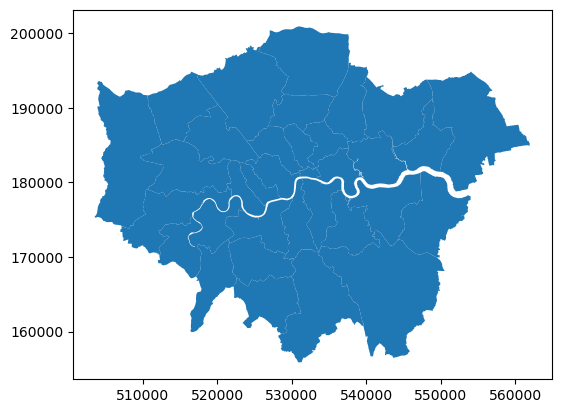

In [7]:
london_borough_geo.plot()

In [8]:
alco_borough = london_borough_geo.merge(alco_df , on = 'area_id')
alco_borough.head()

area_name_x    area_id  \
0  Kingston upon Thames  E09000021   
1               Croydon  E09000008   
2               Bromley  E09000006   
3              Hounslow  E09000018   
4                Ealing  E09000009   

                                            geometry           area_name_y  \
0  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  Kingston upon Thames   
1  POLYGON ((535009.2 159504.7, 535005.5 159502, ...               Croydon   
2  POLYGON ((540373.6 157530.4, 540361.2 157551.9...               Bromley   
3  POLYGON ((521975.8 178100, 521967.7 178096.8, ...              Hounslow   
4  POLYGON ((510253.5 182881.6, 510249.9 182886, ...                Ealing   

   f_alcohol  Apprenticeship   Level 1   Level 2   Level 3   Level 4  \
0   0.427808        0.008465  0.041746  0.052053  0.057624  0.177274   
1   0.430331        0.009110  0.059470  0.065547  0.049196  0.136730   
2   0.525810        0.014314  0.071553  0.084586  0.060534  0.173936   
3   0.430054        0.007225  0.050494  0.049637  0.042061  0.148621   
4   0.438695        0.006355  0.043275  0.045952  0.042128  0.162471   

   No qualifications    Others  
0           0.057353  0.033295  
1           0.075814  0.034463  
2           0.094196  0.026691  
3           0.074537  0.057479  
4           0.072200  0.066314

In [10]:
alco_borough['coords'] = alco_borough['geometry'].apply(lambda x: x.representative_point().coords[:])
alco_borough['coords'] = [coords[0] for coords in alco_borough['coords']]
alco_borough.head()

area_name_x    area_id  \
0  Kingston upon Thames  E09000021   
1               Croydon  E09000008   
2               Bromley  E09000006   
3              Hounslow  E09000018   
4                Ealing  E09000009   

                                            geometry           area_name_y  \
0  POLYGON ((516401.6 160201.8, 516407.3 160210.5...  Kingston upon Thames   
1  POLYGON ((535009.2 159504.7, 535005.5 159502, ...               Croydon   
2  POLYGON ((540373.6 157530.4, 540361.2 157551.9...               Bromley   
3  POLYGON ((521975.8 178100, 521967.7 178096.8, ...              Hounslow   
4  POLYGON ((510253.5 182881.6, 510249.9 182886, ...                Ealing   

   f_alcohol  Apprenticeship   Level 1   Level 2   Level 3   Level 4  \
0   0.427808        0.008465  0.041746  0.052053  0.057624  0.177274   
1   0.430331        0.009110  0.059470  0.065547  0.049196  0.136730   
2   0.525810        0.014314  0.071553  0.084586  0.060534  0.173936   
3   0.430054        0.007225  0.050494  0.049637  0.042061  0.148621   
4   0.438695        0.006355  0.043275  0.045952  0.042128  0.162471   

   No qualifications    Others                                   coords  
0           0.057353  0.033295           (519994.2485496496, 166150.85)  
1           0.075814  0.034463  (534962.0104805692, 163446.84999999998)  
2           0.094196  0.026691           (543635.0728800413, 165067.35)  
3           0.074537  0.057479                 (512742.5814, 174963.45)  
4           0.072200  0.066314            (517056.6275229358, 181946.0)

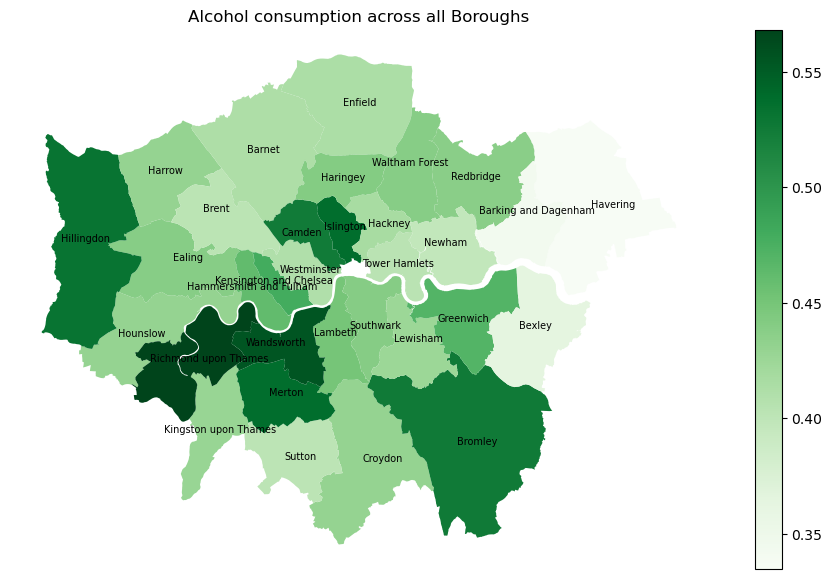

In [12]:

ax2 = alco_borough.plot(column='f_alcohol',legend=True,cmap='Greens',figsize=[12,7])
plt.title('Alcohol consumption across all Boroughs')
for idx, row in alco_borough.iterrows():
    plt.annotate(text=row['area_name_x'], xy=row['coords'],
                 horizontalalignment='center',fontsize=7)
ax2.set_axis_off()
plt.savefig('C:/Users/Neeraja/Desktop/New folder/2011 CENSUS DATASET/alco.png')

### Task 3

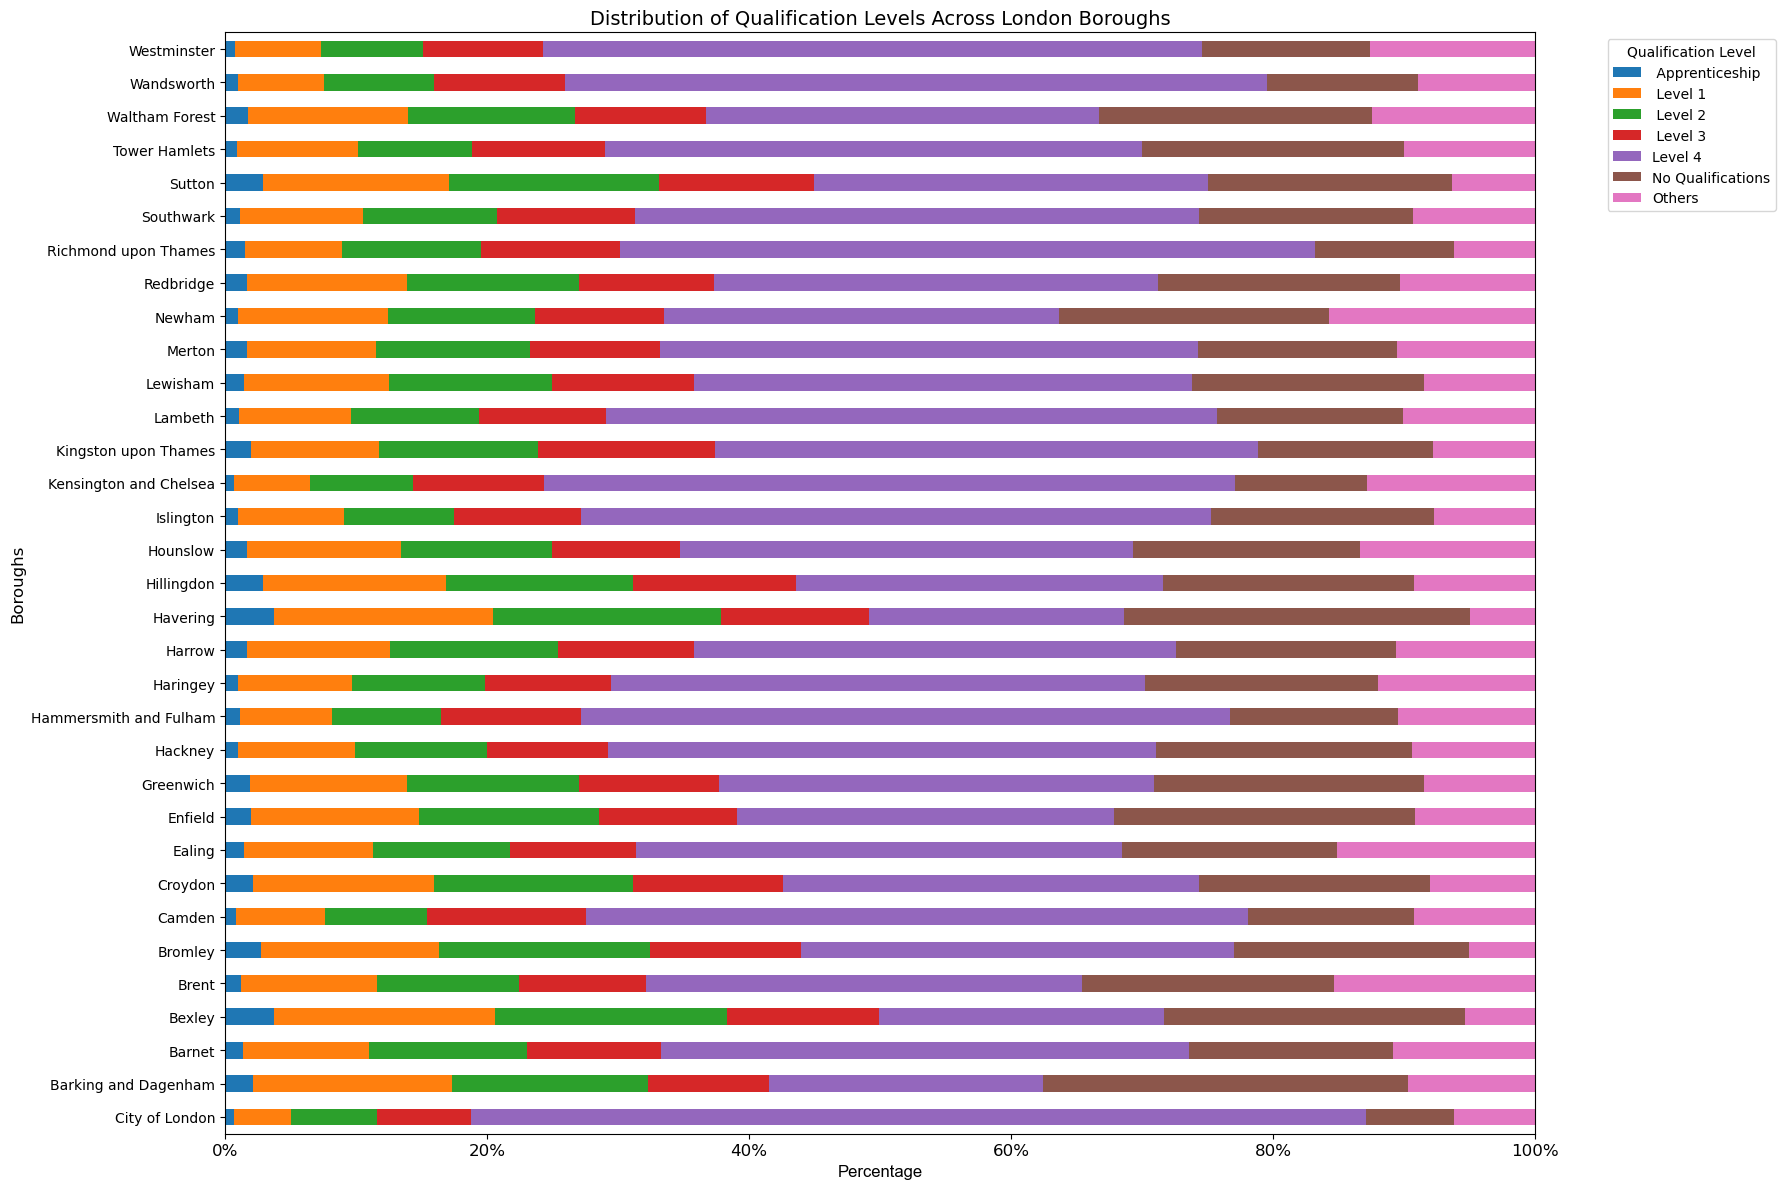

In [16]:
df = pd.read_csv("C:/Users/Neeraja/Desktop/New folder/2011 CENSUS DATASET/2011_CENSUS_DATA_LONDON.csv")

# Display first few rows
#print("First few rows of the dataset:")
#print(df.head())
qualification_cols = [' Apprenticeship', ' Level 1', ' Level 2', ' Level 3 ', 'Level 4 ', 'No Qualifications', 'Others']
df_plot = df[['area_name'] + qualification_cols].set_index('area_name')
df_plot_pct = df_plot.div(df_plot.sum(axis=1), axis=0) * 100

# Increase figure width and adjust spacing
fig, ax = plt.subplots(figsize=(18, 12))  # Increased width

df_plot_pct.plot(kind='barh', stacked=True, ax=ax)

ax.set_title('Distribution of Qualification Levels Across London Boroughs', fontsize=14)
ax.set_xlabel('Percentage', fontsize=12,fontname="Arial")
ax.set_ylabel('Boroughs', fontsize=12)

# Set x-axis limits and tick spacing
ax.set_xlim(0, 100)
ax.set_xticks([0, 20, 40, 60, 80, 100])
ax.set_xticklabels(['0%', '20%', '40%', '60%', '80%', '100%'], fontsize=12)

# Adjust y-axis label font size for readability
ax.tick_params(axis='y', labelsize=10)

# Move legend outside the plot
ax.legend(title='Qualification Level', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('C:/Users/Neeraja/Desktop/New folder/2011 CENSUS DATASET/education_plot2.png')
plt.show()

### Task 3 analysis part

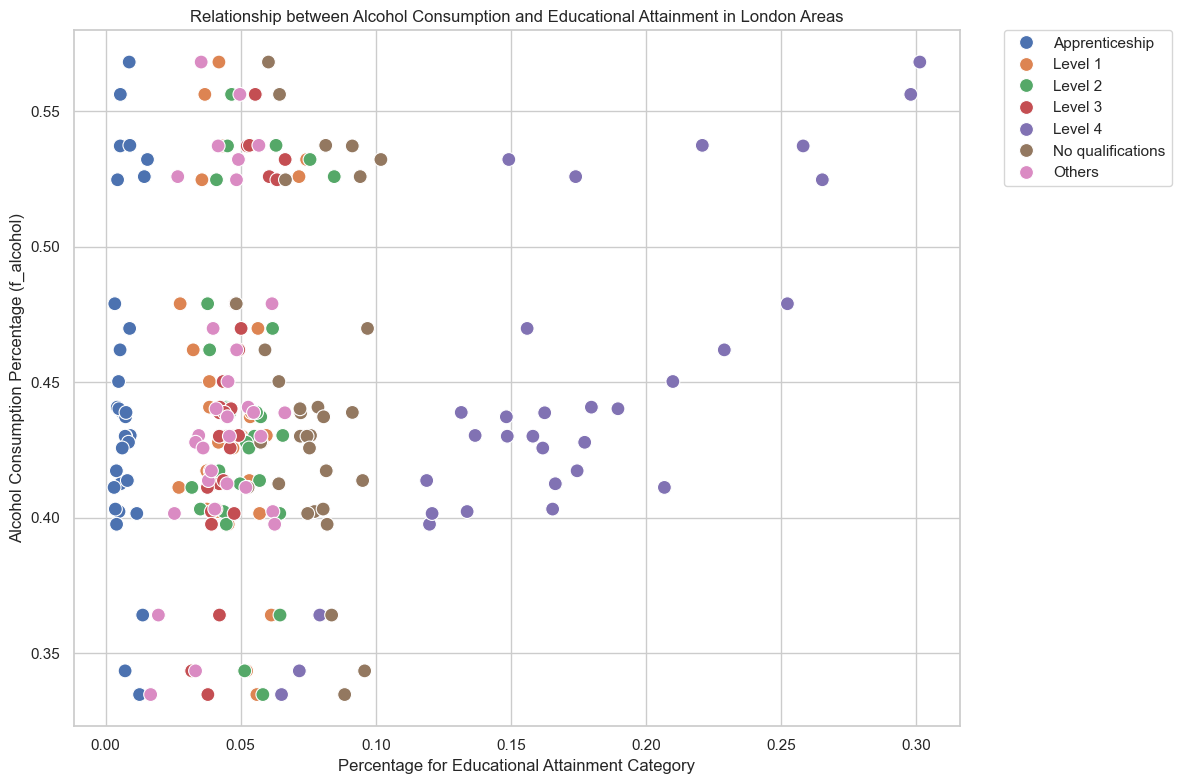

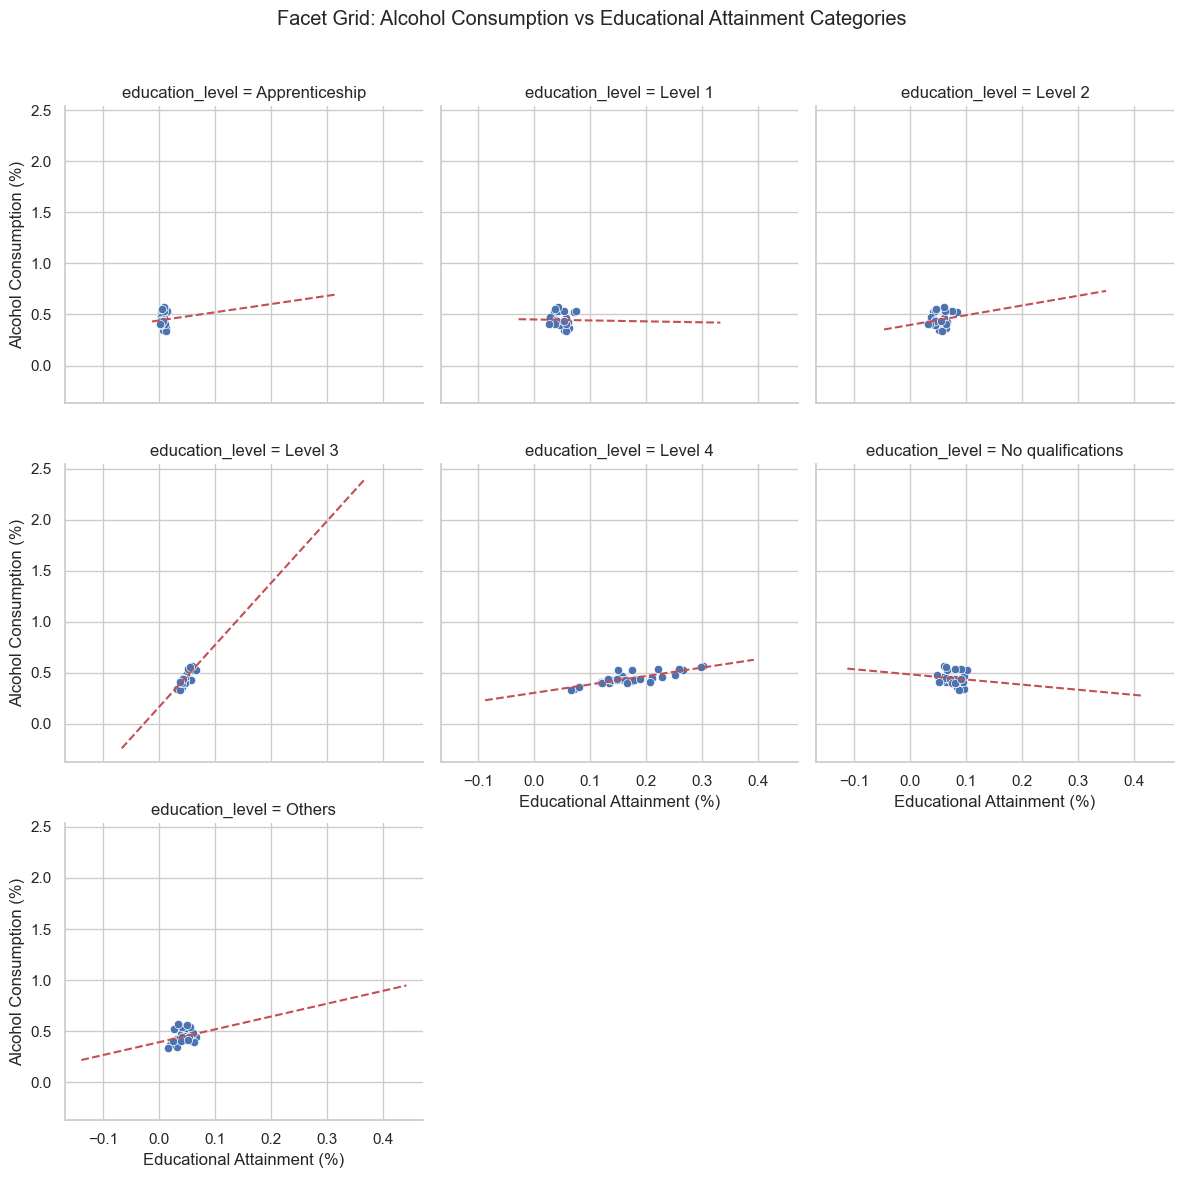

Visualizations created.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the excel file from the provided path using the provided function
#FILEPATH = 'alcoeduforanalysis.xlsx'
#dataframes = read_all_sheets_from_excel(FILEPATH)

# There is one sheet: 'Sheet1'
#df = dataframes['Sheet1']
df = pd.read_excel("C:/Users/Neeraja/Desktop/New folder/TESCO GROCERY DATASET/alcoeduforanalysis.xlsx")
# Display first few rows
#print(df.head())

# Set a seaborn style
sns.set(style='whitegrid')

# ----------------------------
# Relationship between alcohol consumption and educational attainment
# Here, we have multiple columns that represent educational attainment: 
# 'alco_apprenticeship', 'alco_level1', 'alco_level2', 'alco_level3', 'alco_level4', 'alco_noquali', 'alco_others'
# Let's create a melted dataframe to use them together in a facet grid scatter plot
cols_to_melt = ['Apprenticeship', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'No qualifications', 'Others']
df_melt = df.melt(id_vars=['area_id', 'area_name', 'f_alcohol'], value_vars=cols_to_melt, var_name='education_level', value_name='percentage')

# Scatter plot: f_alcohol vs each educational attainment percentage
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_melt, x='percentage', y='f_alcohol', hue='education_level', palette='deep', s=100)
plt.xlabel('Percentage for Educational Attainment Category')
plt.ylabel('Alcohol Consumption Percentage (f_alcohol)')
plt.title('Relationship between Alcohol Consumption and Educational Attainment in London Areas')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.show()

# ----------------------------
# Visualization 3: Facet grid to view relationship for each educational attainment category separately
g = sns.FacetGrid(df_melt, col='education_level', col_wrap=3, height=4, sharex=True, sharey=True)
# Plot scatter for each facet
g.map(sns.scatterplot, 'percentage', 'f_alcohol')
# Add a linear fit line in each facet using regplot
import numpy as np
import scipy.stats as stats

# Function to add regression line to each facet
def add_reg_line(x, y, **kwargs):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = intercept + slope * x_vals
    plt.gca().plot(x_vals, y_vals, '--r')

g.map(add_reg_line, 'percentage', 'f_alcohol')
g.set_axis_labels('Educational Attainment (%)', 'Alcohol Consumption (%)')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Facet Grid: Alcohol Consumption vs Educational Attainment Categories')
plt.show()

print('Visualizations created.')
    

In [23]:
# Define education categories
education_cols = ['Apprenticeship', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'No qualifications', 'Others']
alcohol_col = "f_alcohol"

# Compute and print correlation for each education level
for col in education_cols:
    pearson_coeff, p_value = stats.pearsonr(df[col], df[alcohol_col])
    print(f"{col}: Pearson Coefficient = {pearson_coeff:.4f}, P-value = {p_value:.4f}")

Apprenticeship: Pearson Coefficient = 0.0444, P-value = 0.8092
Level 1: Pearson Coefficient = -0.0175, P-value = 0.9242
Level 2: Pearson Coefficient = 0.1873, P-value = 0.3048
Level 3: Pearson Coefficient = 0.8352, P-value = 0.0000
Level 4: Pearson Coefficient = 0.8227, P-value = 0.0000
No qualifications: Pearson Coefficient = -0.1152, P-value = 0.5303
Others: Pearson Coefficient = 0.2614, P-value = 0.1484


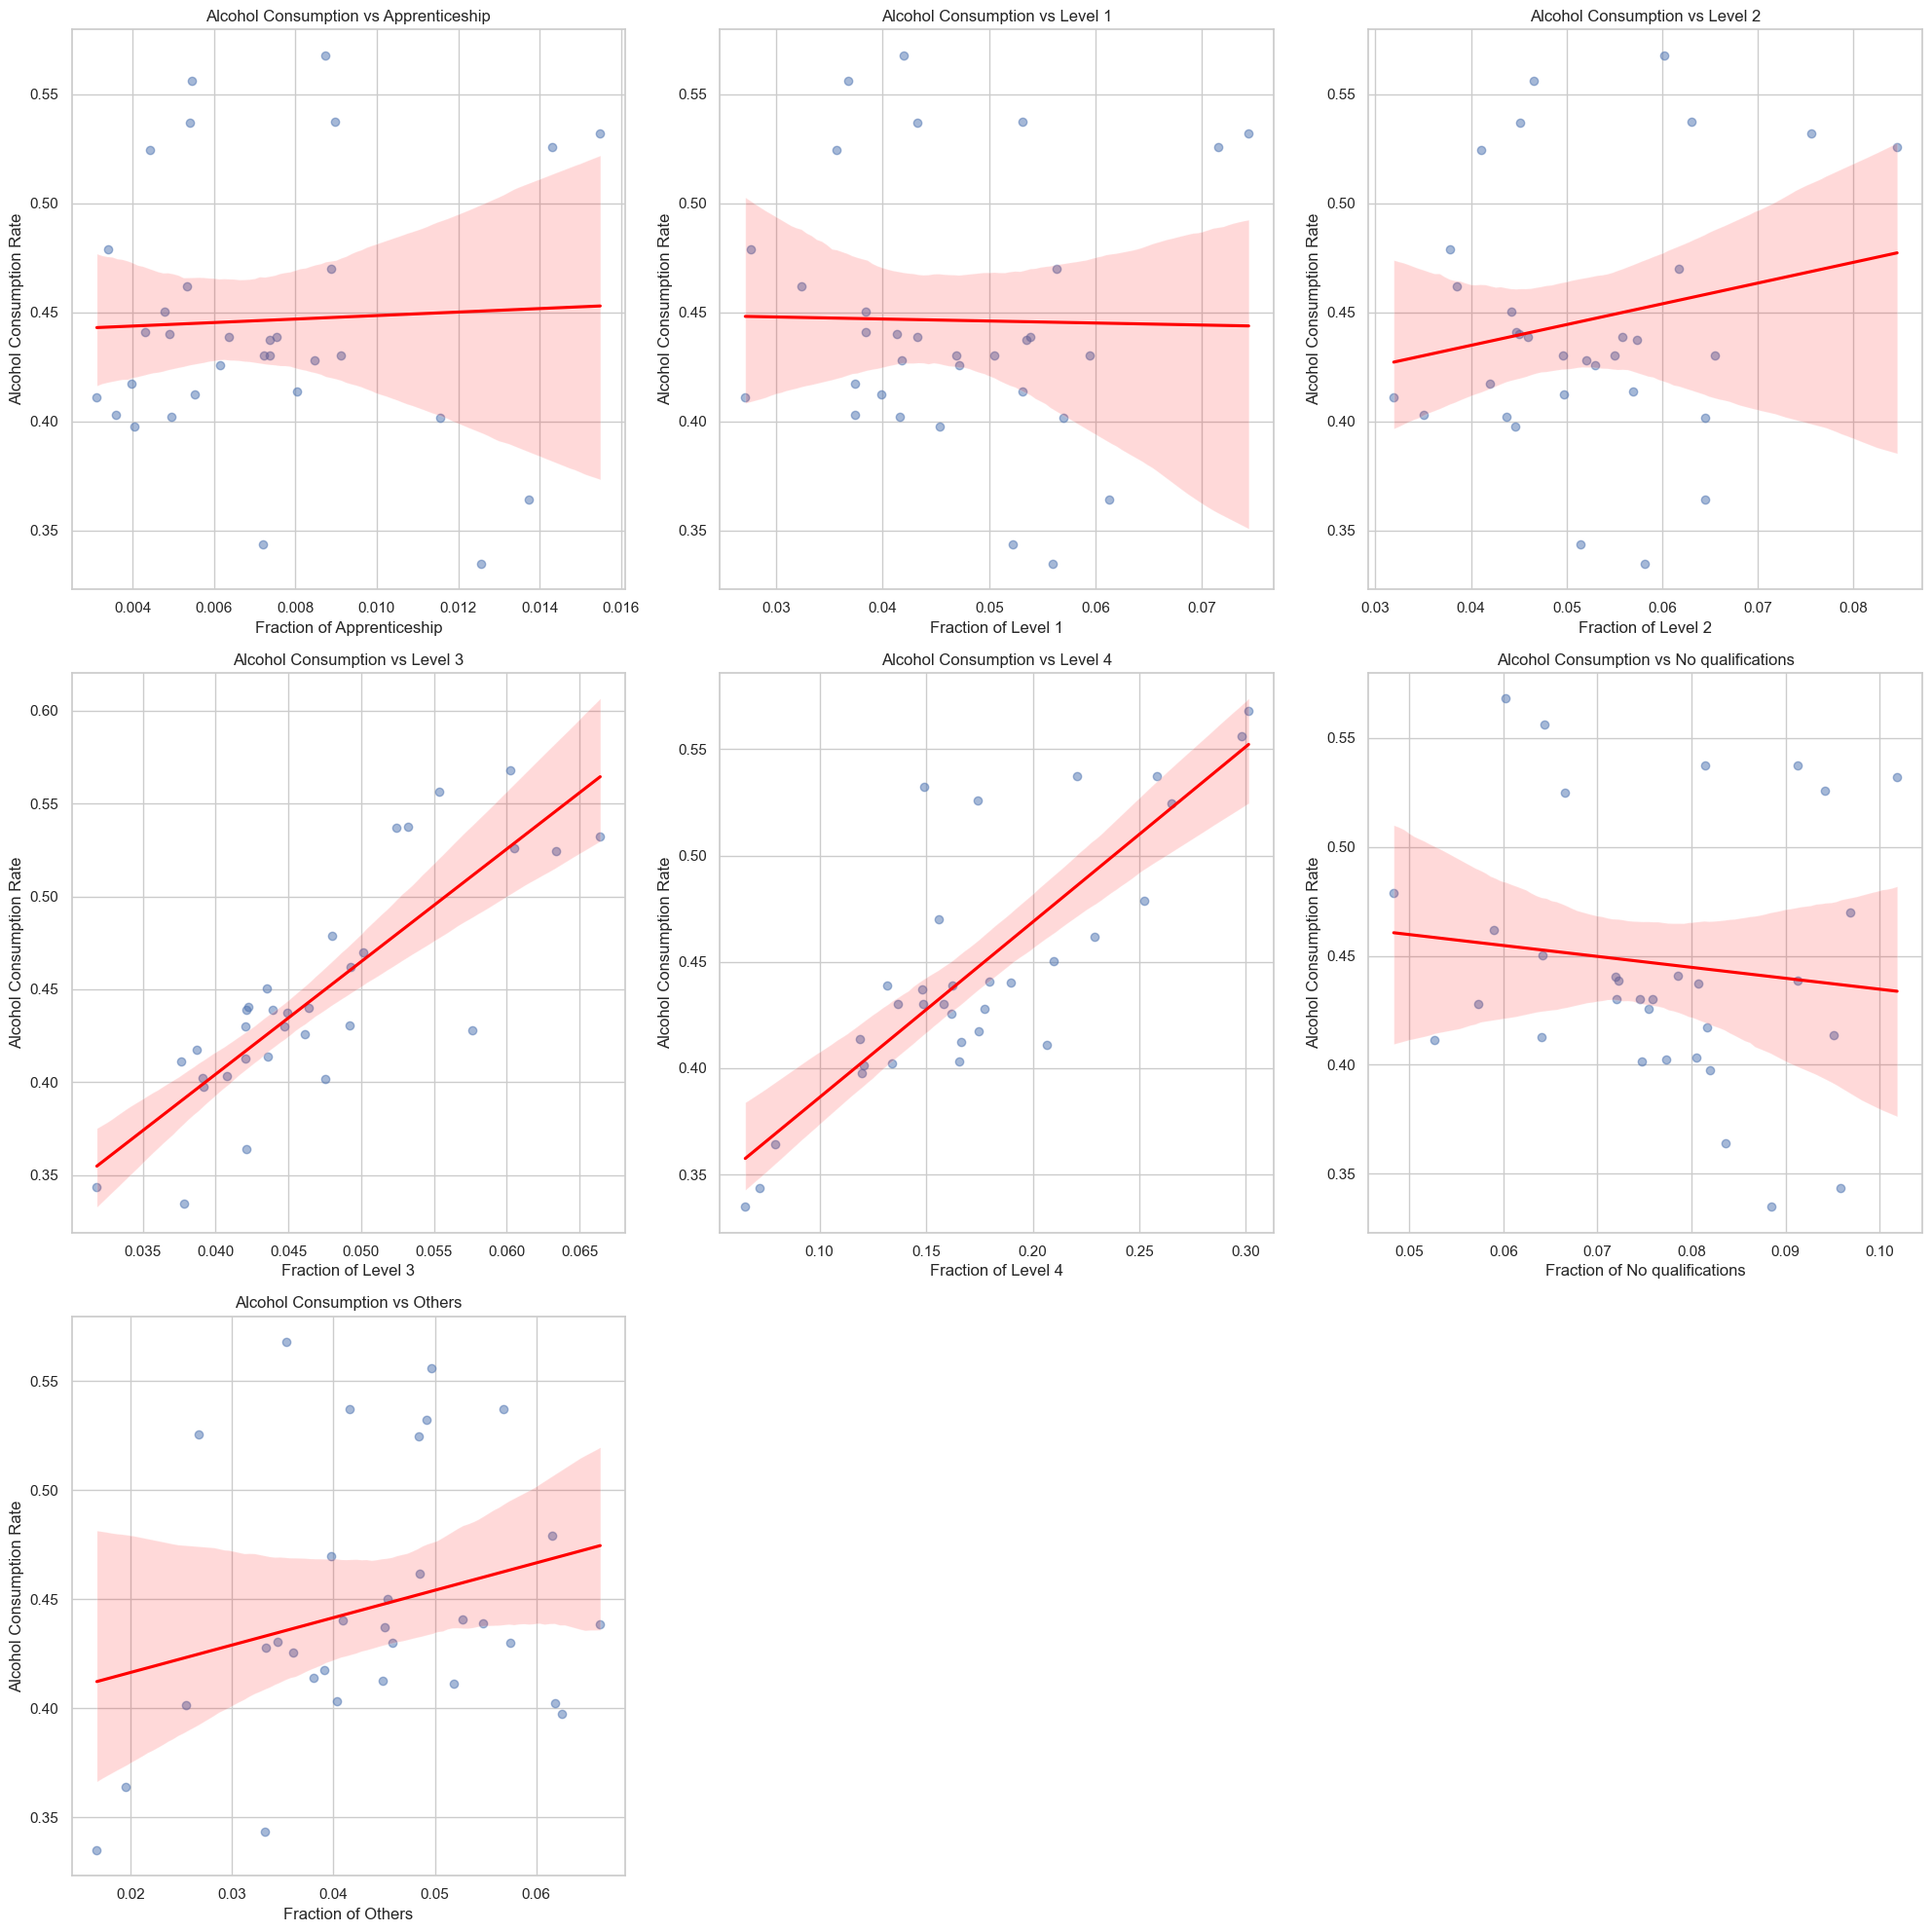

Regression Statistics:
Apprenticeship:
R-squared: 0.0020
p-value: 0.8092
Slope: 0.8024
Level 1:
R-squared: 0.0003
p-value: 0.9242
Slope: -0.0923
Level 2:
R-squared: 0.0351
p-value: 0.3048
Slope: 0.9515
Level 3:
R-squared: 0.6975
p-value: 0.0000
Slope: 6.0636
Level 4:
R-squared: 0.6768
p-value: 0.0000
Slope: 0.8243
No qualifications:
R-squared: 0.0133
p-value: 0.5303
Slope: -0.5013
Others:
R-squared: 0.0683
p-value: 0.1484
Slope: 1.2563


In [21]:
#df = pd.read_excel('alcoeduforanalysis.xlsx')

# Create subplots for each educational level
fig, axes = plt.subplots(3, 3, figsize=(20, 20))
axes = axes.ravel()

# Educational columns
edu_cols = ['Apprenticeship', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'No qualifications', 'Others']

# Create regression plots
for idx, col in enumerate(edu_cols):
    sns.regplot(data=df, x=col, y='f_alcohol', ax=axes[idx],
                scatter_kws={'alpha':0.5}, 
                line_kws={'color': 'red'},
                ci=95)
    axes[idx].set_title(f'Alcohol Consumption vs {col}')
    axes[idx].set_xlabel(f'Fraction of {col}')
    axes[idx].set_ylabel('Alcohol Consumption Rate')

# Remove empty subplot
axes[-1].remove()
axes[-2].remove()

plt.tight_layout()
plt.savefig('C:/Users/Neeraja/Desktop/New folder/2011 CENSUS DATASET/regression_plot.png')
plt.show()

# Calculate R-squared values and create summary statistics
from scipy import stats

print("\
Regression Statistics:")
for col in edu_cols:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col], df['f_alcohol'])
    r_squared = r_value ** 2
    print(f"\
{col}:")
    print(f"R-squared: {r_squared:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Slope: {slope:.4f}")